# Implementing Multiple Regression 📈
---
Once again following the coursera course, althought now on youtube. I like to write in code myself for understanding.

In [39]:
! pip install matplotlib kagglehub pandas numpy scikit-learn

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import kagglehub

In [41]:
# Download latest version
path = kagglehub.dataset_download("nikhil7280/student-performance-multiple-linear-regression")

print("Path to dataset files:", path)

dataset_path = path + '/Student_Performance.csv'

Using Colab cache for faster access to the 'student-performance-multiple-linear-regression' dataset.
Path to dataset files: /kaggle/input/student-performance-multiple-linear-regression


## The dataset

---

This synthetic dataset I found on [kaggle](https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression) will work nicely. Below is the rundown from the page on Kaggle:

---

The Student Performance Dataset is a dataset designed to examine the factors influencing academic student performance. The dataset consists of 10,000 student records, with each record containing information about various predictors and a performance index.
Variables:
    
> Hours Studied: The total number of hours spent studying by each student.

> Previous Scores: The scores obtained by students in previous tests.

> Extracurricular Activities: Whether the student participates in extracurricular activities (Yes or No).

> Sleep Hours: The average number of hours of sleep the student had per day.
    
> Sample Question Papers Practiced: The number of sample question papers the student practiced.

Target Variable:

> Performance Index: A measure of the overall performance of each student. The performance index represents the student's academic performance and has been rounded to the nearest integer. The index ranges from 10 to 100, with higher values indicating better performance.


In [42]:
df = pd.read_csv(dataset_path)

print(df.head())
df.shape

   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  


(10000, 6)

In [43]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB
None


We will need to convert `Extracurricular Activities` to a 1 or 0.

In [44]:
print(df.describe())

       Hours Studied  Previous Scores   Sleep Hours  \
count   10000.000000     10000.000000  10000.000000   
mean        4.992900        69.445700      6.530600   
std         2.589309        17.343152      1.695863   
min         1.000000        40.000000      4.000000   
25%         3.000000        54.000000      5.000000   
50%         5.000000        69.000000      7.000000   
75%         7.000000        85.000000      8.000000   
max         9.000000        99.000000      9.000000   

       Sample Question Papers Practiced  Performance Index  
count                      10000.000000       10000.000000  
mean                           4.583300          55.224800  
std                            2.867348          19.212558  
min                            0.000000          10.000000  
25%                            2.000000          40.000000  
50%                            5.000000          55.000000  
75%                            7.000000          71.000000  
max             

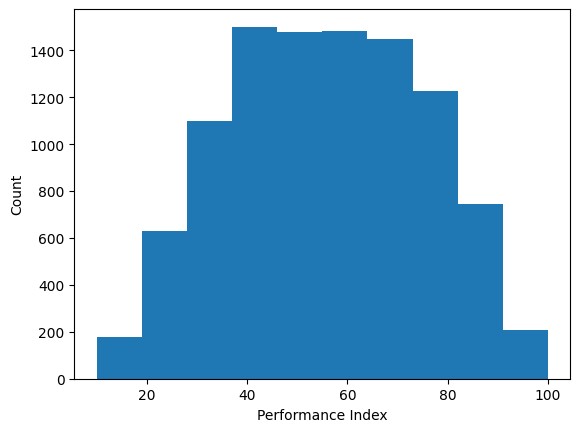

In [45]:
plt.hist(df['Performance Index'])
plt.xlabel("Performance Index")
plt.ylabel("Count")
plt.show()

### Split the data into training and testing

In [58]:
# let's do binary encoding on Extracurricular Activities
df['Extracurricular Activities'] = df['Extracurricular Activities'].replace({ 'Yes': 1, 'No': 0})

X = df.drop('Performance Index', axis=1).to_numpy()
y = df['Performance Index'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=808)

X.shape[0], X_train.shape[0]

(10000, 7500)

## Implementing gradient descent

In [62]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters):
    m = X.shape[0]
    w = w_in
    b = b_in
    cost_history = []

    for i in range(num_iters):
        predictions = np.dot(X, w) + b

        error = predictions - y

        dj_dw = (1/m) * np.dot(X.T, error)
        dj_db = (1/m) * np.sum(error)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        cost = np.mean(error**2) / 2 # Mean squared error cost
        cost_history.append(cost)

    return w, b, cost_history

In [79]:
w_init = np.zeros(X_train.shape[1])
b_init = 0
learning_rate = 0.0003
iterations = 1000

w_final, b_final, history = gradient_descent(X_train, y_train, w_init, b_init, learning_rate, iterations)

print(f"Final w: {w_final}")
print(f"Final b: {b_final}")

Final w: [ 1.83942107  0.79426232 -0.09488014 -1.00170248 -0.27491928]
Final b: -0.2913845718006765



RMSE on Test Set: 5.8526


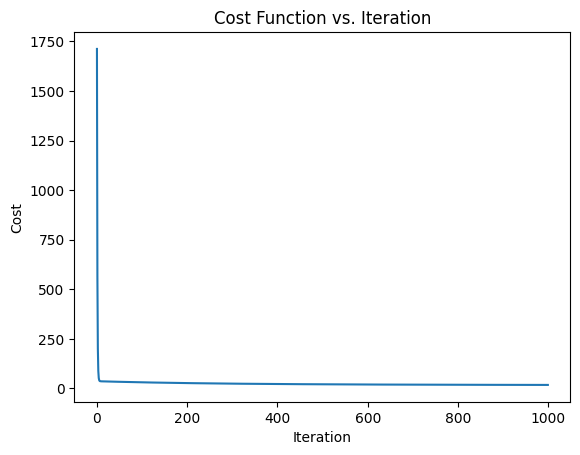

In [80]:
from sklearn.metrics import mean_squared_error

# making predictions on the test data
predictions_test = np.dot(X_test, w_final) + b_final

# calculating RMSE
rmse_test = np.sqrt(mean_squared_error(y_test, predictions_test))
print(f"\nRMSE on Test Set: {rmse_test:.4f}")

# cost history
plt.figure() # Create a new figure
plt.plot(history)
plt.title("Cost Function vs. Iteration")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.show()